In [2]:
# import numpy and pandas
import numpy as np
import pandas as pd

In [3]:
# define number of runners to take from each dataset
numRunnersToAnalyze = 100;

In [4]:
# read several datasets
data1=pd.read_fwf('Women2013.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)
data1['year']=2013
data1['gender']='F'
data2=pd.read_fwf('Women2015.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)
data2['year']=2015
data2['gender']='F'
data3=pd.read_fwf('Women2018.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)
data3['year']=2018
data3['gender']='F'
data4=pd.read_fwf('Women2019.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)
data4['year']=2019
data4['gender']='F'
data5=pd.read_fwf('Men2013.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)
data5['year']=2013
data5['gender']='M'
data6=pd.read_fwf('Men2015.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)
data6['year']=2015
data6['gender']='M'
data7=pd.read_fwf('Men2018.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)
data7['year']=2018
data7['gender']='M'
data8=pd.read_fwf('Men2019.txt', names=["time","name","country","place","marathon","day","month"]).head(numRunnersToAnalyze)
data8['year']=2019
data8['gender']='M'

# concatenate the data into one data frame
final=pd.concat([data1, data2, data3, data4, data5, data6, data7, data8])
final.head()

,time,name,country,place,marathon,day,month,year,gender
0,2:19:57,Rita Jeptoo,KEN,1,Chicago,13,OCT,2013,F
1,2:20:15,Priscah Jeptoo,KEN,1,London,21,APR,2013,F
2,2:20:48,Jemima Jelegat,KEN,2,Chicago,13,OCT,2013,F
3,2:21:05,Feyse Tadesse,ETH,1,Paris,7,APR,2013,F
4,2:21:13,Florence Kiplagat,KEN,1,Berlin,29,SEP,2013,F


In [5]:
final.to_csv('what.csv')

In [6]:
def timeToSeconds(time):
    temp=time.split(':')
    return 3600*int(temp[0])+60*int(temp[1])+int(temp[2])

In [7]:
final['seconds']=final['time'].apply(lambda x: timeToSeconds(x))

In [8]:
final.head()

,time,name,country,place,marathon,day,month,year,gender,seconds
0,2:19:57,Rita Jeptoo,KEN,1,Chicago,13,OCT,2013,F,8397
1,2:20:15,Priscah Jeptoo,KEN,1,London,21,APR,2013,F,8415
2,2:20:48,Jemima Jelegat,KEN,2,Chicago,13,OCT,2013,F,8448
3,2:21:05,Feyse Tadesse,ETH,1,Paris,7,APR,2013,F,8465
4,2:21:13,Florence Kiplagat,KEN,1,Berlin,29,SEP,2013,F,8473


In [9]:
final.to_csv('marathon.csv')

In [14]:
final.groupby(['year','gender']).describe()['seconds']

count     mean         std     min      25%     50%      75%  \
year gender                                                                 
2013 F       100.0  8711.01  108.202345  8397.0  8628.75  8743.5  8801.00   
     M       100.0  7638.51   76.462507  7403.0  7594.75  7664.0  7697.00   
2015 F       100.0  8680.72  111.784522  8365.0  8619.25  8682.0  8774.50   
     M       100.0  7647.51   62.861158  7440.0  7607.50  7662.5  7696.25   
2018 F       100.0  8577.08  117.733021  8291.0  8504.25  8601.0  8672.00   
     M       100.0  7587.38   76.949909  7299.0  7548.50  7599.0  7650.50   
2019 F       100.0  8534.72  121.842346  8044.0  8460.25  8566.0  8630.00   
     M       100.0  7552.71   70.937203  7301.0  7515.25  7572.5  7608.25   

                max  
year gender          
2013 F       8867.0  
     M       7726.0  
2015 F       8836.0  
     M       7733.0  
2018 F       8739.0  
     M       7693.0  
2019 F       8746.0  
     M       7635.0

In [28]:
final_graph=final.groupby(['year','gender']).mean()['seconds']

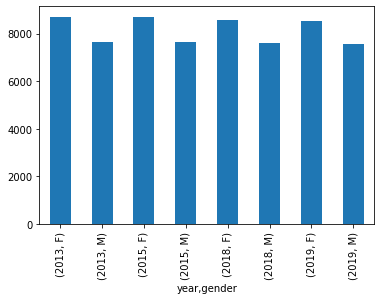

In [29]:
%matplotlib inline

final_graph.plot.bar()